In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
vehicles = pd.read_csv('vehicles.csv')
vehicles

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,7301591192,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,...,NaN,sedan,NaN,https://images.craigslist.org/00o0o_iiraFnHg8q...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:31-0600
426876,7301591187,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,...,NaN,sedan,red,https://images.craigslist.org/00x0x_15sbgnxCIS...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:29-0600
426877,7301591147,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,...,NaN,hatchback,white,https://images.craigslist.org/00L0L_farM7bxnxR...,Carvana is the safer way to buy a car During t...,NaN,wy,33.779214,-84.411811,2021-04-04T03:21:17-0600
426878,7301591140,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,...,NaN,sedan,silver,https://images.craigslist.org/00z0z_bKnIVGLkDT...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:11-0600


In [ ]:
nan_values = vehicles.isna().sum()
print("NaN Values in the DataFrame:")
print(nan_values)

NaN Values in the DataFrame:
id                   0
url                  0
region               0
region_url           0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
image_url           68
description         70
county          426880
state                0
lat               6549
long              6549
posting_date        68
dtype: int64


In [ ]:
vehicles.drop(['region_url', 'county', 'description', 'image_url', 'url','lat','long','id'], axis=1, inplace=True)
#dropping columns which are of no use to our analysis
vehicles.rename(columns={'fuel' : 'inputTypeOfFuel', 'odometer' : 'distanceTravelled', 'title_status' : 'StateOfVehicle', 'type' : 'Classification', 'paint_color' : 'VechicleColor'}, inplace=True)
vehicles
# print(vehicles.dtypes)

,region,price,year,manufacturer,model,condition,cylinders,inputTypeOfFuel,distanceTravelled,StateOfVehicle,transmission,VIN,drive,size,Classification,VechicleColor,state,posting_date
0,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN
1,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN
2,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN
3,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN
4,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,1N4AA6AV6KC367801,fwd,NaN,sedan,NaN,wy,2021-04-04T03:21:31-0600
426876,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,7JR102FKXLG042696,fwd,NaN,sedan,red,wy,2021-04-04T03:21:29-0600
426877,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,1GYFZFR46LF088296,NaN,NaN,hatchback,white,wy,2021-04-04T03:21:17-0600
426878,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,58ABK1GG4JU103853,fwd,NaN,sedan,silver,wy,2021-04-04T03:21:11-0600


In [ ]:
# vehicles['year'] = vehicles['year'].astype('Int64')
# vehicles['distanceTravelled'] = vehicles['distanceTravelled'].astype('Int64')
# print(vehicles.dtypes)

#dropped nan values
vehicles = vehicles.dropna()


vehicles

,region,price,year,manufacturer,model,condition,cylinders,inputTypeOfFuel,distanceTravelled,StateOfVehicle,transmission,VIN,drive,size,Classification,VechicleColor,state,posting_date
126,auburn,0,2018.0,chevrolet,express cargo van,like new,6 cylinders,gas,68472.0,clean,automatic,1GCWGAFP8J1309579,rwd,full-size,van,white,al,2021-04-12T11:20:35-0500
127,auburn,0,2019.0,chevrolet,express cargo van,like new,6 cylinders,gas,69125.0,clean,automatic,1GCWGAFP4K1214373,rwd,full-size,van,white,al,2021-04-12T11:20:00-0500
128,auburn,0,2018.0,chevrolet,express cargo van,like new,6 cylinders,gas,66555.0,clean,automatic,1GCWGAFPXJ1337903,rwd,full-size,van,white,al,2021-04-12T11:19:58-0500
215,birmingham,4000,2002.0,toyota,echo,excellent,4 cylinders,gas,155000.0,clean,automatic,JTDBT123520243495,fwd,compact,sedan,blue,al,2021-05-03T17:48:17-0500
219,birmingham,2500,1995.0,bmw,525i,fair,6 cylinders,gas,110661.0,clean,automatic,WBAHD6322SGK86772,rwd,mid-size,sedan,white,al,2021-05-03T16:03:27-0500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426788,wyoming,12995,2016.0,chevrolet,cruze lt,like new,4 cylinders,gas,61127.0,clean,automatic,1G1BE5SM0G7266569,fwd,compact,sedan,silver,wy,2021-04-07T11:58:09-0600
426792,wyoming,32999,2014.0,ford,"f350, xlt",excellent,8 cylinders,diesel,154642.0,clean,automatic,1FT8W3DT3EEB41548,4wd,full-size,pickup,brown,wy,2021-04-07T09:06:54-0600
426793,wyoming,15999,2018.0,chevrolet,"cruze, lt",excellent,4 cylinders,gas,36465.0,clean,automatic,1G1BE5SM7J7133704,fwd,mid-size,sedan,black,wy,2021-04-07T09:03:17-0600
426833,wyoming,6800,1997.0,jaguar,xk8 convertible,good,8 cylinders,gas,69550.0,clean,automatic,SAJGX2749VCOO8376,rwd,compact,convertible,white,wy,2021-04-05T16:29:38-0600


In [ ]:
vehicles['classification'].value_counts()


KeyError: 'classification'

In [ ]:
total_cars_foreach_year = vehicles['year'].value_counts()



In [ ]:
vehicles.head()
vehicles.info()
vehicles.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 79195 entries, 31 to 426836
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   region             79195 non-null  object 
 1   price              79195 non-null  int64  
 2   year               79195 non-null  float64
 3   manufacturer       79195 non-null  object 
 4   model              79195 non-null  object 
 5   condition          79195 non-null  object 
 6   cylinders          79195 non-null  object 
 7   inputTypeOfFuel    79195 non-null  object 
 8   distanceTravelled  79195 non-null  float64
 9   stateOfVehicle     79195 non-null  object 
 10  transmission       79195 non-null  object 
 11  drive              79195 non-null  object 
 12  size               79195 non-null  object 
 13  classification     79195 non-null  object 
 14  vechicleColor      79195 non-null  object 
 15  state              79195 non-null  object 
 16  posting_date       79195 

,price,year,distanceTravelled
count,7.919500e+04,79195.000000,7.919500e+04
mean,7.943274e+04,2008.481937,1.244489e+05
std,1.387575e+07,9.993920,2.430582e+05
min,0.000000e+00,1900.000000,0.000000e+00
25%,4.950000e+03,2006.000000,7.300000e+04
50%,9.000000e+03,2011.000000,1.140000e+05
75%,1.750000e+04,2014.000000,1.554140e+05
max,3.736929e+09,2022.000000,1.000000e+07


In [ ]:
vehicles.dtypes

region                object
price                  int64
year                 float64
manufacturer          object
model                 object
condition             object
cylinders             object
inputTypeOfFuel       object
distanceTravelled    float64
stateOfVehicle        object
transmission          object
drive                 object
size                  object
classification        object
vechicleColor         object
state                 object
posting_date          object
dtype: object

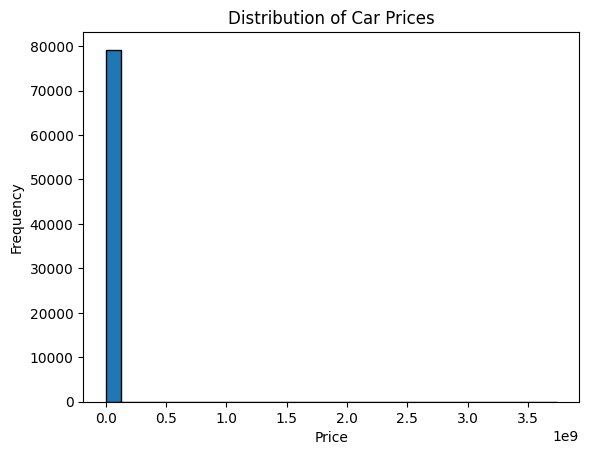

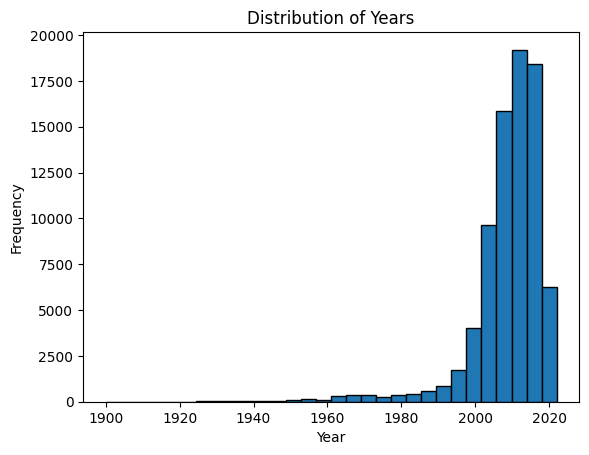

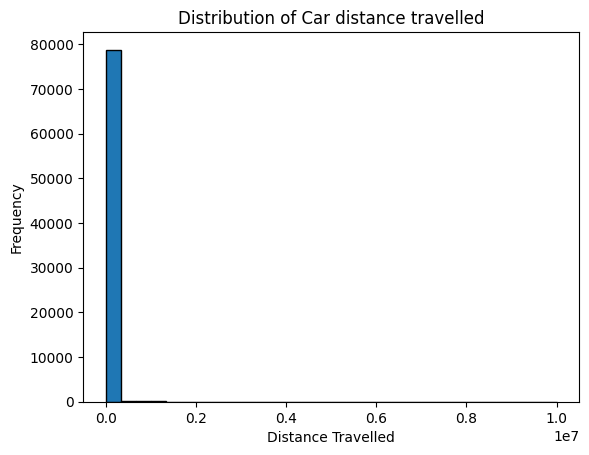

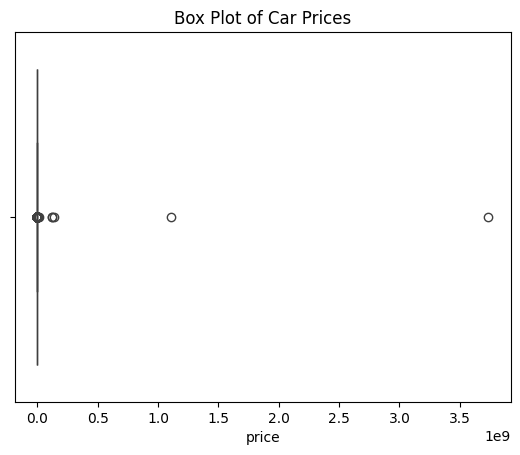

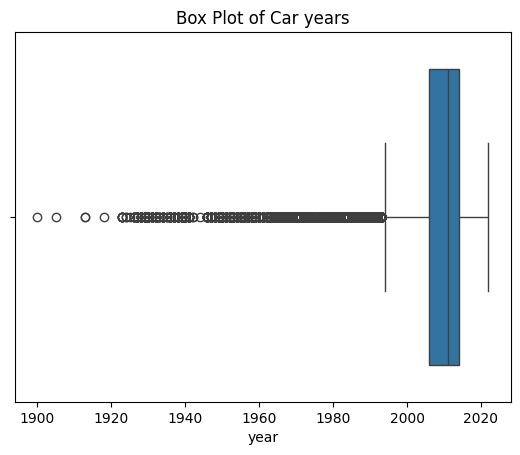

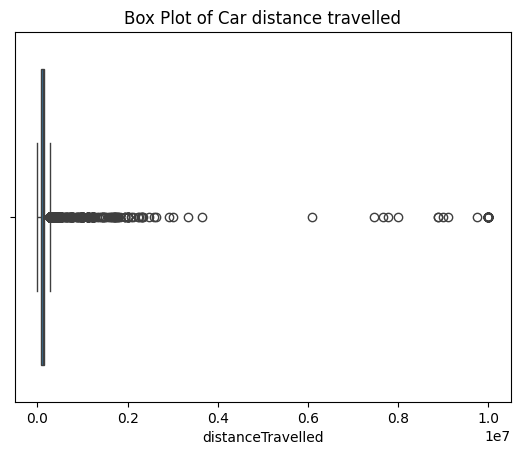

Summary Statistics for Car Prices:
Mean price: 79432.7371298693
Median price: 9000.0
Mode of price: 0
Summary Statistics for Car Years:
Mean year: 2008.4819369909717
Median year: 2011.0
Mode of year: 2013.0
Summary Statistics for Car distance travelled:
Mean distance Travelled: 124448.90618094576
Median distance Travelled: 114000.0
Mode of distance Travelled: 200000.0


In [ ]:
######-------------Univariate data analysis-------------######



#------Distribution of the data------#

#distribution of car prices
plt.hist(vehicles['price'], bins=30, edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Car Prices')
plt.show()

#distribution of car years
plt.hist(vehicles['year'], bins=30, edgecolor='black')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Distribution of Years')
plt.show()

#distribution of car distance travelled
plt.hist(vehicles['distanceTravelled'], bins=30, edgecolor='black')
plt.xlabel('Distance Travelled')
plt.ylabel('Frequency')
plt.title('Distribution of Car distance travelled')
plt.show()


#------Box plot to check for outliers------#

# Box plot for price
sns.boxplot(x=vehicles['price'])
plt.title('Box Plot of Car Prices')
plt.show()

# Box plot for year
sns.boxplot(x=vehicles['year'])
plt.title('Box Plot of Car years')
plt.show()

# Box plot for distance travelled
sns.boxplot(x=vehicles['distanceTravelled'])
plt.title('Box Plot of Car distance travelled')
plt.show()


#------Summary of the data------#

# Summary statistics for price
print("Summary Statistics for Car Prices:")
print("Mean price:", vehicles['price'].mean())
print("Median price:", vehicles['price'].median())
print("Mode of price:", vehicles['price'].mode()[0])

# Summary statistics for year
print("Summary Statistics for Car Years:")
print("Mean year:", vehicles['year'].mean())
print("Median year:", vehicles['year'].median())
print("Mode of year:", vehicles['year'].mode()[0])

# Summary statistics for distance travelled
print("Summary Statistics for Car distance travelled:")
print("Mean distance Travelled:", vehicles['distanceTravelled'].mean())
print("Median distance Travelled:", vehicles['distanceTravelled'].median())
print("Mode of distance Travelled:", vehicles['distanceTravelled'].mode()[0])

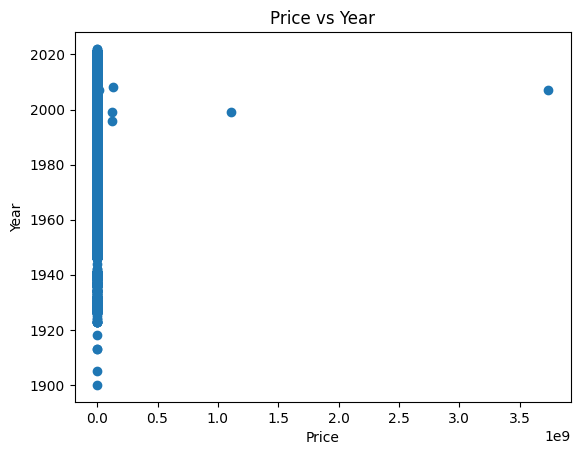

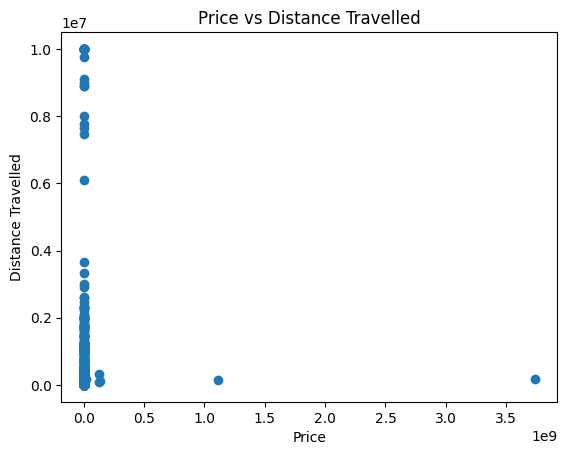

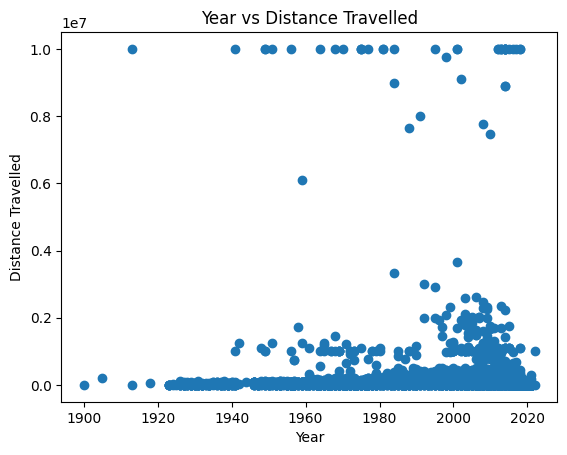

                      price  distanceTravelled      year
price              1.000000           0.000620 -0.001535
distanceTravelled  0.000620           1.000000 -0.091326
year              -0.001535          -0.091326  1.000000


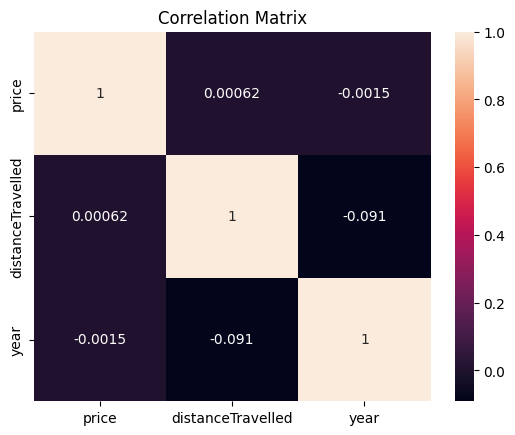

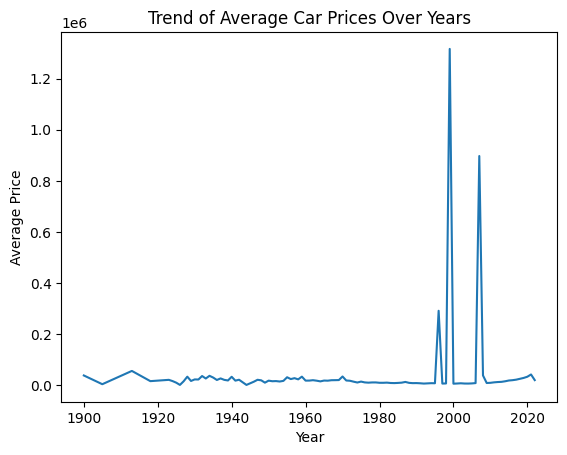

In [ ]:
######-------------Bivariate data analysis-------------######

#------Correlation between price and year------#

plt.scatter(vehicles['price'], vehicles['year'])
plt.xlabel('Price')
plt.ylabel('Year')
plt.title('Price vs Year')
plt.show()

#------Correlation between price and distance travelled------#

plt.scatter(vehicles['price'], vehicles['distanceTravelled'])
plt.xlabel('Price')
plt.ylabel('Distance Travelled')
plt.title('Price vs Distance Travelled')
plt.show()

#------Correlation between year and distance travelled------#

plt.scatter(vehicles['year'], vehicles['distanceTravelled'])
plt.xlabel('Year')
plt.ylabel('Distance Travelled')
plt.title('Year vs Distance Travelled')
plt.show()


#------Correlation Coefficient------#

correlation_matrix = vehicles[['price', 'distanceTravelled', 'year']].corr()
print(correlation_matrix)

sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()


#------Comparitive Analysis------#

# Line graph for average price over years
yearly_prices = vehicles.groupby('year')['price'].mean()
plt.plot(yearly_prices)
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.title('Trend of Average Car Prices Over Years')
plt.show()

In [ ]:
# ######-------------Time series analysis-------------######

# # Plotting the price trend over time
# vehicles['price'].plot(figsize=(10, 6))
# plt.title('Car Price Trend Over Time')
# plt.xlabel('posting_date')
# plt.ylabel('Price')
# plt.show()

# # Group data by state and date, then plot the trends
# # import matplotlib.pyplot as plt

# states = vehicles['state'].unique()

# # Assuming 'posting_date' is your datetime index
# for state in states:
#     state_data = vehicles[vehicles['state'] == state]
#     # Resampling monthly and calculating the mean
#     state_data['price'].mean().plot(figsize=(10, 6), label=state)

# plt.title('Monthly Average Car Prices by State')
# plt.xlabel('Date')
# plt.ylabel('Average Price')
# plt.legend()
# plt.show()